## Stock Market Prediction Using Different Machine Learning Algorithms


In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cd /content/drive/My Drive/AI lab

/content/drive/My Drive/AI lab


In [5]:
#Importing the dataset
df=pd.read_csv("Stock_ZMYD1.csv")
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2001-04-08,16387.0,16690.0,16379.0,16690.0,105522480,6413
2001-04-10,16495.0,16495.0,16495.0,16495.0,3364980,204
2001-04-11,16200.0,16200.0,16000.0,16000.0,66762000,4170
2001-04-14,16000.0,16000.0,15700.0,16000.0,154041834,9654
2001-04-15,16000.0,16200.0,16000.0,16200.0,50549340,3143


In [6]:
df_new.dtypes

<FIRST>    float64
<HIGH>     float64
<LOW>      float64
<CLOSE>    float64
<VALUE>      int64
<VOL>        int64
dtype: object

In [7]:
df_new.shape

(3889, 6)

In [8]:
df_new.describe

<bound method NDFrame.describe of             <FIRST>   <HIGH>    <LOW>  <CLOSE>        <VALUE>      <VOL>
datetime                                                                
2001-04-08  16387.0  16690.0  16379.0  16690.0      105522480       6413
2001-04-10  16495.0  16495.0  16495.0  16495.0        3364980        204
2001-04-11  16200.0  16200.0  16000.0  16000.0       66762000       4170
2001-04-14  16000.0  16000.0  15700.0  16000.0      154041834       9654
2001-04-15  16000.0  16200.0  16000.0  16200.0       50549340       3143
...             ...      ...      ...      ...            ...        ...
2020-05-20  11149.0  11149.0  11149.0  11149.0    97550739770    8749730
2020-05-23  11680.0  11706.0  11150.0  11643.0  1613620738967  138593153
2020-05-30  11061.0  11061.0  11061.0  11061.0   148747841316   13447956
2020-05-31  10508.0  10508.0  10508.0  10727.0    27225387360    2590920
2020-06-01  10191.0  10191.0  10191.0  10242.0    39620600373    3887803

[3889 rows x 6 c

In [9]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Calculating the technical indicators

In [10]:
#1. Simple n day moving average
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2


In [11]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5,9512.588423
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0,9899.935982
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2,10111.038531
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2,10223.031525
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2,10226.480339


In [12]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5,9512.588423,3534.0
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0,9899.935982,3765.0
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2,10111.038531,2932.0
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2,10223.031525,2240.0
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2,10226.480339,1400.0


In [13]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5,9512.588423,3534.0,NaN
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0,9899.935982,3765.0,0.886691
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2,10111.038531,2932.0,NaN
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2,10223.031525,2240.0,inf
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2,10226.480339,1400.0,inf


In [14]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5,9512.588423,3534.0,NaN,0.781149
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0,9899.935982,3765.0,0.886691,0.827007
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2,10111.038531,2932.0,NaN,0.827007
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2,10223.031525,2240.0,inf,0.827007
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2,10226.480339,1400.0,inf,0.827007


In [15]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [16]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2001-04-08,16387.0,16690.0,16379.0,16690.0,105522480,6413,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2001-04-10,16495.0,16495.0,16495.0,16495.0,3364980,204,-195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-11,16200.0,16200.0,16000.0,16000.0,66762000,4170,-495.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2001-04-14,16000.0,16000.0,15700.0,16000.0,154041834,9654,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2001-04-15,16000.0,16200.0,16000.0,16200.0,50549340,3143,200.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [ ]:
#8. Larry Williams R%
#lEFT

In [17]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5,9512.588423,3534.0,NaN,0.781149,1541.307481,1292.388846,248.918635,NaN
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0,9899.935982,3765.0,0.886691,0.827007,1620.243747,1357.959826,262.283921,NaN
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2,10111.038531,2932.0,NaN,0.827007,1617.196733,1409.807208,207.389526,NaN
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2,10223.031525,2240.0,inf,0.827007,1569.736005,1441.792967,127.943038,inf
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2,10226.480339,1400.0,inf,0.827007,1475.973485,1448.629071,27.344415,NaN


In [18]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-20,11149.0,11149.0,11149.0,11149.0,97550739770,8749730,530.0,9420.5,9512.588423,3534.0,NaN,0.781149,1541.307481,1292.388846,248.918635,NaN,1.591967
2020-05-23,11680.0,11706.0,11150.0,11643.0,1613620738967,138593153,494.0,9797.0,9899.935982,3765.0,0.886691,0.827007,1620.243747,1357.959826,262.283921,NaN,1.521004
2020-05-30,11061.0,11061.0,11061.0,11061.0,148747841316,13447956,-582.0,10090.2,10111.038531,2932.0,NaN,0.827007,1617.196733,1409.807208,207.389526,NaN,0.950491
2020-05-31,10508.0,10508.0,10508.0,10727.0,27225387360,2590920,-334.0,10314.2,10223.031525,2240.0,inf,0.827007,1569.736005,1441.792967,127.943038,inf,0.350360
2020-06-01,10191.0,10191.0,10191.0,10242.0,39620600373,3887803,-485.0,10454.2,10226.480339,1400.0,inf,0.827007,1475.973485,1448.629071,27.344415,NaN,-0.288717


In [19]:
df_new.mean()

<FIRST>            3.989101e+03
<HIGH>             4.037091e+03
<LOW>              3.944152e+03
<CLOSE>            4.000354e+03
<VALUE>            2.164058e+10
<VOL>              1.349677e+07
change_in_price   -1.658436e+00
MA_10              3.977932e+03
WMA_10             3.978448e+03
MOM_10            -1.667698e+01
SO_k                        NaN
SO_10              5.221624e-01
MACD_12_26        -1.573275e+01
MACDsign_12_26    -1.712997e+01
MACDdiff_12_26     1.426747e+00
Acc/Dist_ROC_10             NaN
CCI_10            -5.582350e-02
dtype: float64

In [20]:
df_new.min()

<FIRST>            5.200000e+02
<HIGH>             5.300000e+02
<LOW>              5.180000e+02
<CLOSE>            5.250000e+02
<VALUE>            6.986000e+04
<VOL>              2.000000e+01
change_in_price   -9.630000e+03
MA_10              5.415000e+02
WMA_10             5.424431e+02
MOM_10            -1.076600e+04
SO_k                       -inf
SO_10             -8.121225e+00
MACD_12_26        -2.694353e+03
MACDsign_12_26    -2.322452e+03
MACDdiff_12_26    -1.043022e+03
Acc/Dist_ROC_10            -inf
CCI_10            -2.846050e+00
dtype: float64

In [21]:
df_new.max()

<FIRST>            2.661500e+04
<HIGH>             2.661500e+04
<LOW>              2.661500e+04
<CLOSE>            2.661500e+04
<VALUE>            2.645561e+12
<VOL>              3.330094e+08
change_in_price    1.169700e+04
MA_10              2.321330e+04
WMA_10             2.260713e+04
MOM_10             1.511900e+04
SO_k                        inf
SO_10              1.027080e+00
MACD_12_26         4.497310e+03
MACDsign_12_26     3.896289e+03
MACDdiff_12_26     1.509492e+03
Acc/Dist_ROC_10             inf
CCI_10             2.840698e+00
dtype: float64

In [22]:
df_new.std()

<FIRST>            4.811431e+03
<HIGH>             4.866774e+03
<LOW>              4.765253e+03
<CLOSE>            4.836308e+03
<VALUE>            8.250127e+10
<VOL>              2.685984e+07
change_in_price    3.469299e+02
MA_10              4.794900e+03
WMA_10             4.783739e+03
MOM_10             1.171496e+03
SO_k                        NaN
SO_10              3.211372e-01
MACD_12_26         3.903220e+02
MACDsign_12_26     3.603874e+02
MACDdiff_12_26     1.280792e+02
Acc/Dist_ROC_10             NaN
CCI_10             1.260382e+00
dtype: float64

## Normalizing Data

In [23]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-20,0.274378,0.272644,0.276080,0.273999,0.028693,-0.014255,0.024929,0.240059,0.250814,0.137171,NaN,0.028310,0.216506,0.210576,0.096960,NaN,0.289760
2020-05-23,0.294727,0.293997,0.276118,0.292934,0.601755,0.375654,0.023241,0.256665,0.268369,0.146095,NaN,0.033322,0.227482,0.221120,0.102196,NaN,0.277281
2020-05-30,0.271006,0.269270,0.272708,0.270627,0.048045,-0.000147,-0.027212,0.269598,0.277937,0.113915,NaN,0.033322,0.227059,0.229458,0.080690,NaN,0.176958
2020-05-31,0.249814,0.248070,0.251517,0.257825,0.002111,-0.032749,-0.015583,0.279478,0.283013,0.087181,NaN,0.033322,0.220459,0.234601,0.049565,NaN,0.071426
2020-06-01,0.237666,0.235918,0.239370,0.239235,0.006796,-0.028855,-0.022663,0.285653,0.283169,0.054730,NaN,0.033322,0.207422,0.235700,0.010154,NaN,-0.040954


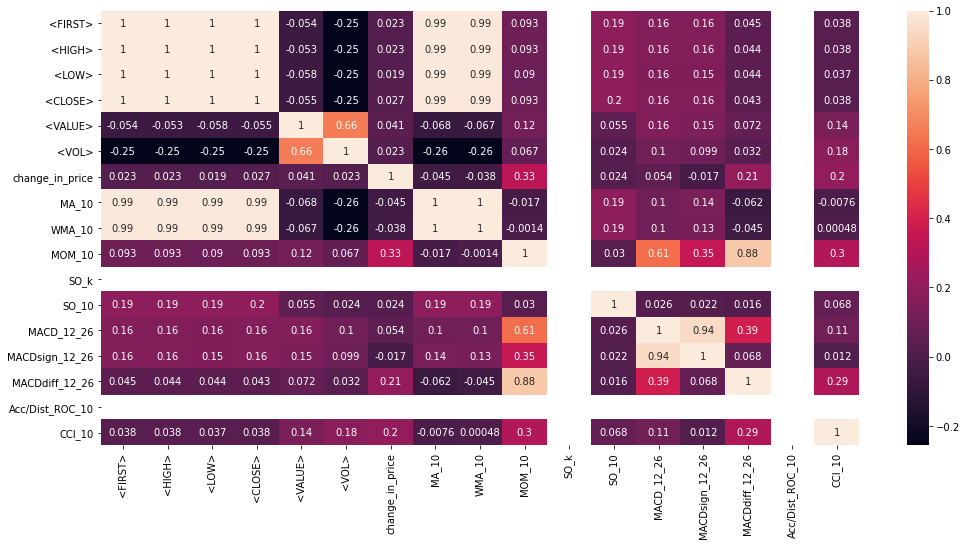

In [24]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [25]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               3889
SO_10                10
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    3889
CCI_10                9
dtype: int64

In [26]:
#Removing the null values
data = data.fillna(data.mean())

In [27]:
data = data.dropna(how="all",axis=1)

In [28]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,CCI_10
datetime,,,,,,,,
2020-05-20,0.240059,0.250814,0.137171,0.028310,0.216506,0.210576,0.096960,0.289760
2020-05-23,0.256665,0.268369,0.146095,0.033322,0.227482,0.221120,0.102196,0.277281
2020-05-30,0.269598,0.277937,0.113915,0.033322,0.227059,0.229458,0.080690,0.176958
2020-05-31,0.279478,0.283013,0.087181,0.033322,0.220459,0.234601,0.049565,0.071426
2020-06-01,0.285653,0.283169,0.054730,0.033322,0.207422,0.235700,0.010154,-0.040954


In [29]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-20    0.273999
2020-05-23    0.292934
2020-05-30    0.270627
2020-05-31    0.257825
2020-06-01    0.239235
Name: <CLOSE>, dtype: float64

In [30]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
CCI_10            0
dtype: int64

In [31]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)

# Predicting using Decision Trees

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [ ]:
y_pred = Regressor.predict([[0.695620,0.711757,0.188182,-0.002462,0.149007,0.161084,0.019457,0.094221]])

In [ ]:
# Print the Accuracy of our Model.
y_pred

array([0.63298006])

## Evaluating the Model

In [ ]:
y_pred = Regressor.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.02570133772924969

# Using Bagging Regressor

In [ ]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [ ]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)
    

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                 n_estimators=50, random_state=0)

In [ ]:
y_pred_br = regr.predict([[0.695620,0.711757,0.188182,-0.002462,0.149007,0.161084,0.019457,0.094221]])
y_pred_br

array([0.67407226])

## Evaluating Bagging Regressor

In [ ]:
y_pred_br = regr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.025126534213514674

# Using Random Forest

In [ ]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=1)

In [ ]:
y_pred_rf = rf.predict([[0.695620,0.711757,0.188182,-0.002462,0.149007,0.161084,0.019457,0.094221]])
y_pred_rf

array([0.67485308])

## Evaluating Random Forest

In [ ]:
y_pred_rf = rf.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.02509558917708132

 ## Using AdaBoost Regressor

In [ ]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=100)

In [ ]:
y_pred_adb = adb_reg.predict([[0.695620,0.711757,0.188182,-0.002462,0.149007,0.161084,0.019457,0.094221]])
y_pred_adb

array([0.66838355])

## Evaluating AdaBoost Regressor

In [ ]:
y_pred_adb = adb_reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.023515375500037444

## Using Gradient Boosting

In [ ]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=50, random_state=1)

In [ ]:
y_pred_gdbt = gdbt.predict([[0.695620,0.711757,0.188182,-0.002462,0.149007,0.161084,0.019457,0.094221]])
y_pred_gdbt

array([0.65726125])

## Evaluating gradient boosting

In [ ]:
y_pred_gdbt = gdbt.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.023810781932720793

## Using XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

##LSTM

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Training and testing set

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3500, 8) (389, 8) (3500,) (389,)


In [115]:
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = sc.fit_transform(x_train)

In [116]:
X_train, Y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Importing libraries

In [ ]:
pip install nsepy

In [47]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM

In [122]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

### Compiling and training the model defined in the above step.
(Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.)

In [123]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0059
Epoch 2/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0013
Epoch 3/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0012
Epoch 4/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0013
Epoch 5/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0013
Epoch 6/15
110/110 [==============================] - 2s 19ms/step - loss: 0.0012
Epoch 7/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0012
Epoch 8/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0012
Epoch 9/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0012
Epoch 10/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0011
Epoch 11/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0011
Epoch 12/15
110/110 [==============================] - 2s 18ms/step - loss: 0.0011
Epoch 13/15
1

In [124]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [125]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [ ]:
predicted_stock_price

In [ ]:
real_stock_price

### Plotting the results

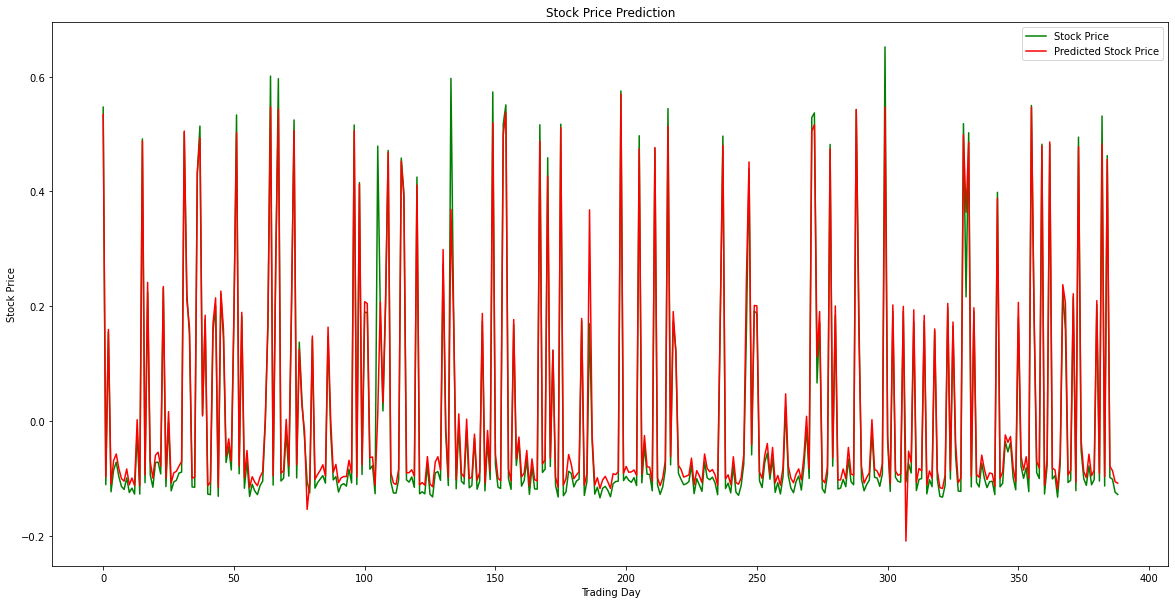

In [126]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()